In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def random_graph(num_vertices, num_edges):
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    adjacency_list = {i: set() for i in range(num_vertices)}
    
    while num_edges:
        i = np.random.randint(0, num_vertices)
        j = np.random.randint(0, num_vertices)
        if i == j or adjacency_matrix[i][j]:
            continue
        adjacency_matrix[i][j] = adjacency_matrix[j][i] = 1
        adjacency_list[i].add(j)
        adjacency_list[j].add(i)
        num_edges -= 1
        
    return adjacency_matrix, adjacency_list


def visualize(adjacency_matrix):
    num_vertices = len(adjacency_matrix)
    graph = nx.Graph() 

    for i in range(num_vertices):
        graph.add_node(i)
        for j in range(i + 1):
            if adjacency_matrix[i][j]:
                graph.add_edge(i, j)
                
    plt.figure(figsize=(16, 9))
    nx.draw_networkx(graph)
    plt.show()

### Generate random graph

In [3]:
num_vertices = 100
num_edges = 200

adjacency_matrix, adjacency_list = random_graph(num_vertices, num_edges)

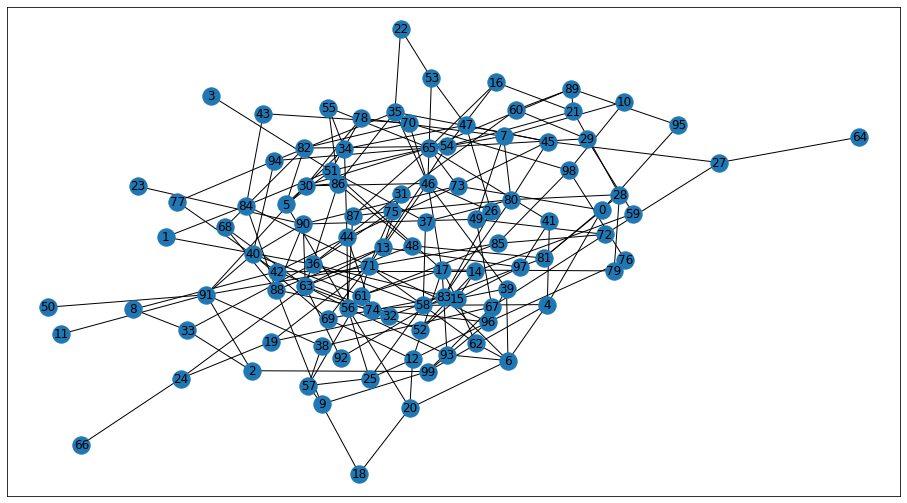

In [4]:
visualize(adjacency_matrix)

### Print several rows of the adjacency matrix

In [5]:
n_rows = 5
for i in range(n_rows):
    print(adjacency_matrix[i], "\n")

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1] 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Print several rows of the adjacency list

In [6]:
for i, key in enumerate(adjacency_list):
    if i == n_rows:
        break
    print(f'{i}: {adjacency_list[key]}', '\n')

0: {81, 73, 4, 95} 

1: {36, 84} 

2: {99, 33, 91} 

3: {51} 

4: {0, 99, 6, 41, 58} 



### Find connected components with DFS

In [7]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            stack.extend(graph[node] - visited)
    return visited
            
def connected_components(graph):
    visited = set()
    components = []
    for node in graph:
        if node not in visited:
            component = dfs(graph, node)
            components.append(component)
            visited |= component
    return components

In [8]:
components = connected_components(adjacency_list)
print(f'Connected components: {len(components)}')

Connected components: 1


### Find a shortest path with BFS

In [9]:
def bfs(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        curr_node, path = queue.pop(0)
        for node in graph[curr_node] - set(path):
            if node == goal:
                return path + [node]
            else:
                queue.append((node, path + [node]))

In [10]:
start_node = np.random.randint(0, num_vertices)
end_node = np.random.randint(0, num_vertices)

shortest_path = bfs(adjacency_list, start_node, end_node)

print(f'start: {start_node}, end: {end_node}')
print(f'shortest path: {shortest_path}')

start: 61, end: 67
shortest path: [61, 85, 72, 67]
